# Imports

In [1]:
import numpy as np
from model import AdaptationModel
from rbb import OrganizationInstrument
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import random
import pandas as pd


import numpy as np
# import np.random
from mesa import Agent
from shapely.geometry import Point
from shapely import contains_xy

# Import functions from functions.py
from functions import generate_random_location_within_map_domain, get_flood_depth, calculate_basic_flood_damage, floodplain_multipolygon
import networkx as nx
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
from mesa import batch_run
import geopandas as gpd
import rasterio as rs
import matplotlib.pyplot as plt
# Import the agent class(es) from agents.py
from agents import Households
from agents import Government

# Import functions from functions.py
from functions import get_flood_map_data, calculate_basic_flood_damage
from functions import map_domain_gdf, floodplain_gdf

from model import AdaptationModel

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Defining Experiments

In [2]:
dyke = OrganizationInstrument(name = 'Dyke', cost = 8, completion_time = 5, protection_level = 0.7, status = 1)
wetland = OrganizationInstrument(name = 'Wetland', cost = 5,  completion_time = 2, protection_level = 0.5, status = 1)  

In [3]:
# Experiment 0
base_case = {
    "number_of_households" : 100,
    "gov_structure":'centralised',
    "gov_detector" : 1, 
    "options_list" : None,
    "flood_probability":0.05,
    "economic_status":'neutral'
        }

In [4]:
# Experiment 1
exp1 = {
    "number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": [[dyke]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [5]:
# Experiment 2
exp2 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": [[wetland]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [6]:
# Experiment 3
exp3 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": [[dyke, wetland]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [7]:
# Experiment 4
exp4 = {"number_of_households" : 100,
    "gov_structure": 'decentralised',
    "gov_detector": 1,
    "options_list": [[dyke]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [8]:
# Experiment 5
exp5 = {"number_of_households" : 100,
    "gov_structure": 'decentralised',
    "gov_detector": 1,
    "options_list": [[wetland]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [9]:
# Experiment 6
exp6 = {"number_of_households" : 100,
    "gov_structure": 'decentralised',
    "gov_detector": 1,
    "options_list": [[dyke, wetland]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [10]:
# Experiment 7
exp7 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": None,
    "flood_probability": 0.1,
    "economic_status": 'growth'
}


In [11]:
# Experiment 8
exp8 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": None,
    "flood_probability": 0.1,
    "economic_status": 'recession'
}


In [12]:
# Experiment 9
exp9 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": None,
    "flood_probability": 0.01,
    "economic_status": 'growth'
}


In [13]:
# Experiment 10
exp10 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": None,
    "flood_probability": 0.01,
    "economic_status": 'recession'
}


In [14]:
# Experiment 11
exp11 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": [[dyke, wetland]],
    "flood_probability": 0.1,
    "economic_status": 'recession'
}


In [15]:
# Experiment 12
exp12 = {"number_of_households" : 100,
    "gov_structure": 'decentralised',
    "gov_detector": 1,
    "options_list": [[dyke, wetland]],
    "flood_probability": 0.1,
    "economic_status": 'growth'
}

In [16]:
experiments = [base_case, exp1, exp2, exp3, exp4, exp5, exp6, exp7, exp8, exp9, exp10, exp11, exp12]

# Running experiments

In [17]:
import timeit

def run_experiment(experiments):
    '''Run all the experiments that are setup'''
    start = timeit.default_timer()
    num = 0
    for experiment in experiments:
        results = batch_run(
            AdaptationModel,
            parameters=experiment,
            iterations=70,
            max_steps=120,
            number_processes=1,
            data_collection_period=1,
            display_progress=True,)
        results = pd.DataFrame(results)
        results.to_csv(f'exp{num}.csv', index=False)
        num+= 1
        
    stop = timeit.default_timer()
    print('Time: ', stop - start)  
    
       

        # ax = sns.lineplot(x="Step", y=kpi, data=results, ci="sd", err_style="band", label=experiment)

        # Customize the plot
            # ax.set_title(kpi, "for Agents over 120 steps with Error Band, with 95% confidence interval")
            # ax.set_xlabel("Steps")
            # ax.set_ylabel(kpi)
            # plt.legend(title="Experiments")

    # Show the plot
plt.show()

run_experiment(experiments)

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

Time:  388.721097291


In [18]:
dfs = []
num = 0
for i in range(13):
    df = pd.read_csv(f'exp{i}.csv')
    dfs.append(df)

In [19]:
dfs1 = []
num = 0
base_case = pd.read_csv('exp0.csv')
dfs1.append(base_case)
for i in range(1, 4):
    print(f'exp{i}.csv')
    df = pd.read_csv(f'exp{i}.csv')
    dfs1.append(df)

exp1.csv
exp2.csv
exp3.csv


In [20]:
dfs2 = []
num = 0
base_case = pd.read_csv('exp0.csv')
dfs2.append(base_case)
for i in range(4, 7):
    print(f'exp{i}.csv')
    df = pd.read_csv(f'exp{i}.csv')
    dfs2.append(df)

exp4.csv
exp5.csv
exp6.csv


In [21]:
dfs3 = []
num = 0
base_case = pd.read_csv('exp0.csv')
dfs3.append(base_case)
for i in range(7, 11):
    print(f'exp{i}.csv')
    df = pd.read_csv(f'exp{i}.csv')
    dfs3.append(df)

exp7.csv
exp8.csv
exp9.csv
exp10.csv


In [22]:
dfs4 = []
num = 0
base_case = pd.read_csv('exp0.csv')
dfs4.append(base_case)
for i in range(11, 13):
    print(f'exp{i}.csv')
    df = pd.read_csv(f'exp{i}.csv')
    dfs4.append(df)

exp11.csv
exp12.csv


# Plot subplots together

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_experiments(KPIs, dfs, exp_start, fignr):
    # Set up the 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    # Flatten the axs array to make indexing more straightforward
    axs = axs.flatten()

    # Define a custom color palette with distinct colors
    custom_palette = sns.color_palette("husl", n_colors=len(dfs) + 1)

    for i, kpi in enumerate(KPIs):
        num = exp_start
        ax = axs[i]  # Use the current subplot
        ax.set_title(f"{kpi} over 120 steps, with 95% confidence interval")
        ax.set_xlabel("Steps")
        ax.set_ylabel(kpi)

        # Plot base case in the first subplot with a custom color
        sns.lineplot(x="Step", y=kpi, data=dfs[0], ci="sd", err_style="band", label="Base case", alpha=0.3, ax=ax, color=custom_palette[0])

        # Plot experiments in the remaining subplots with custom colors
        for j, df in enumerate(dfs[1:]):
            sns.lineplot(x="Step", y=kpi, data=df, ci="sd", err_style="band", label=f"Experiment {num}", alpha=0.9, ax=ax, color=custom_palette[j + 1])
            num += 1

        # Add legend to the last subplot
        if i == len(KPIs) - 1:
            ax.legend(title="Experiments", loc='center left', bbox_to_anchor=(1, 0.5))

    # Adjust layout
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f"combined_plot{fignr}.png", dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

In [73]:
KPIs = ["Average flood damage", 'Average Adaptation Motivation','total_decisions_to_adapt', 'total_adapted_households']

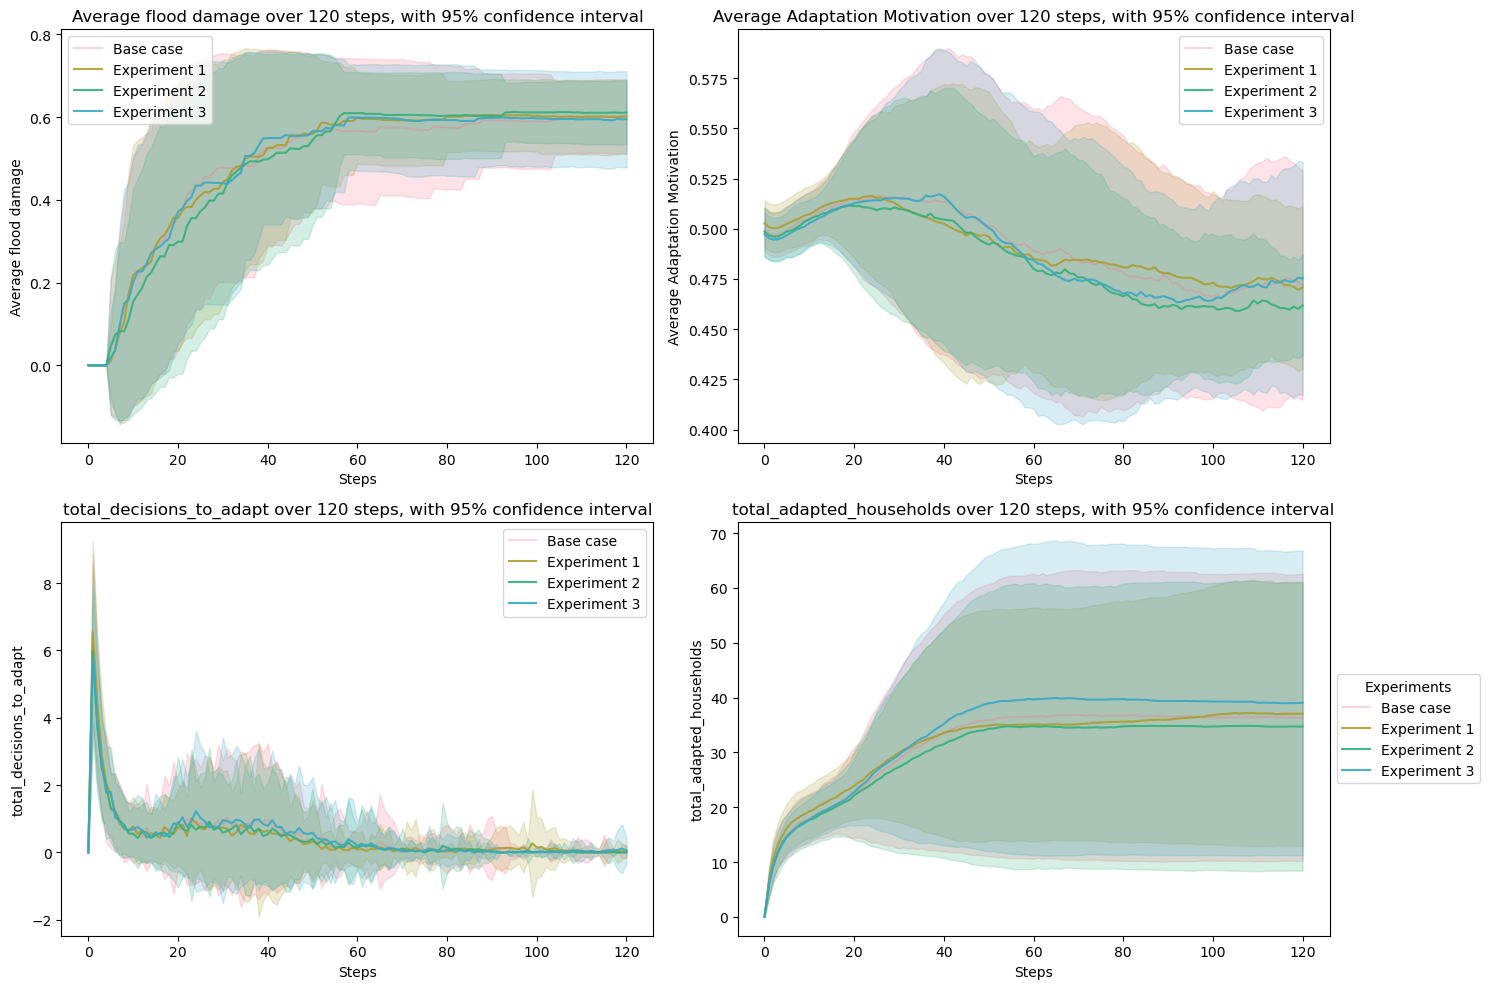

In [74]:
plot_experiments(KPIs, dfs1, 1, 1)

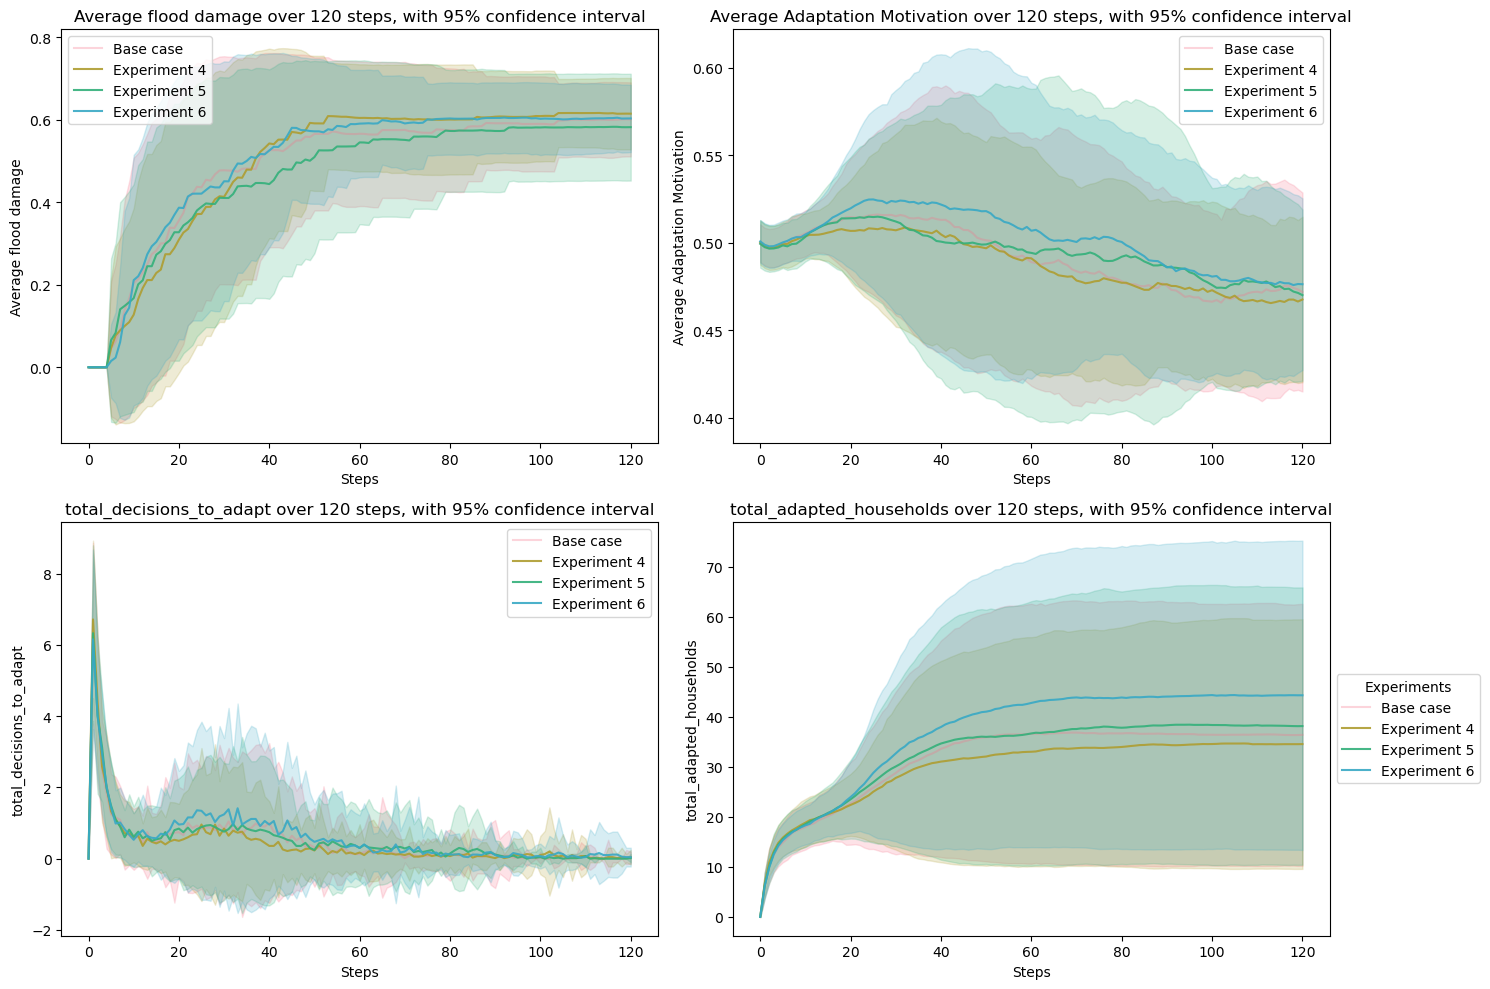

In [75]:
plot_experiments(KPIs, dfs2, 4, 2)

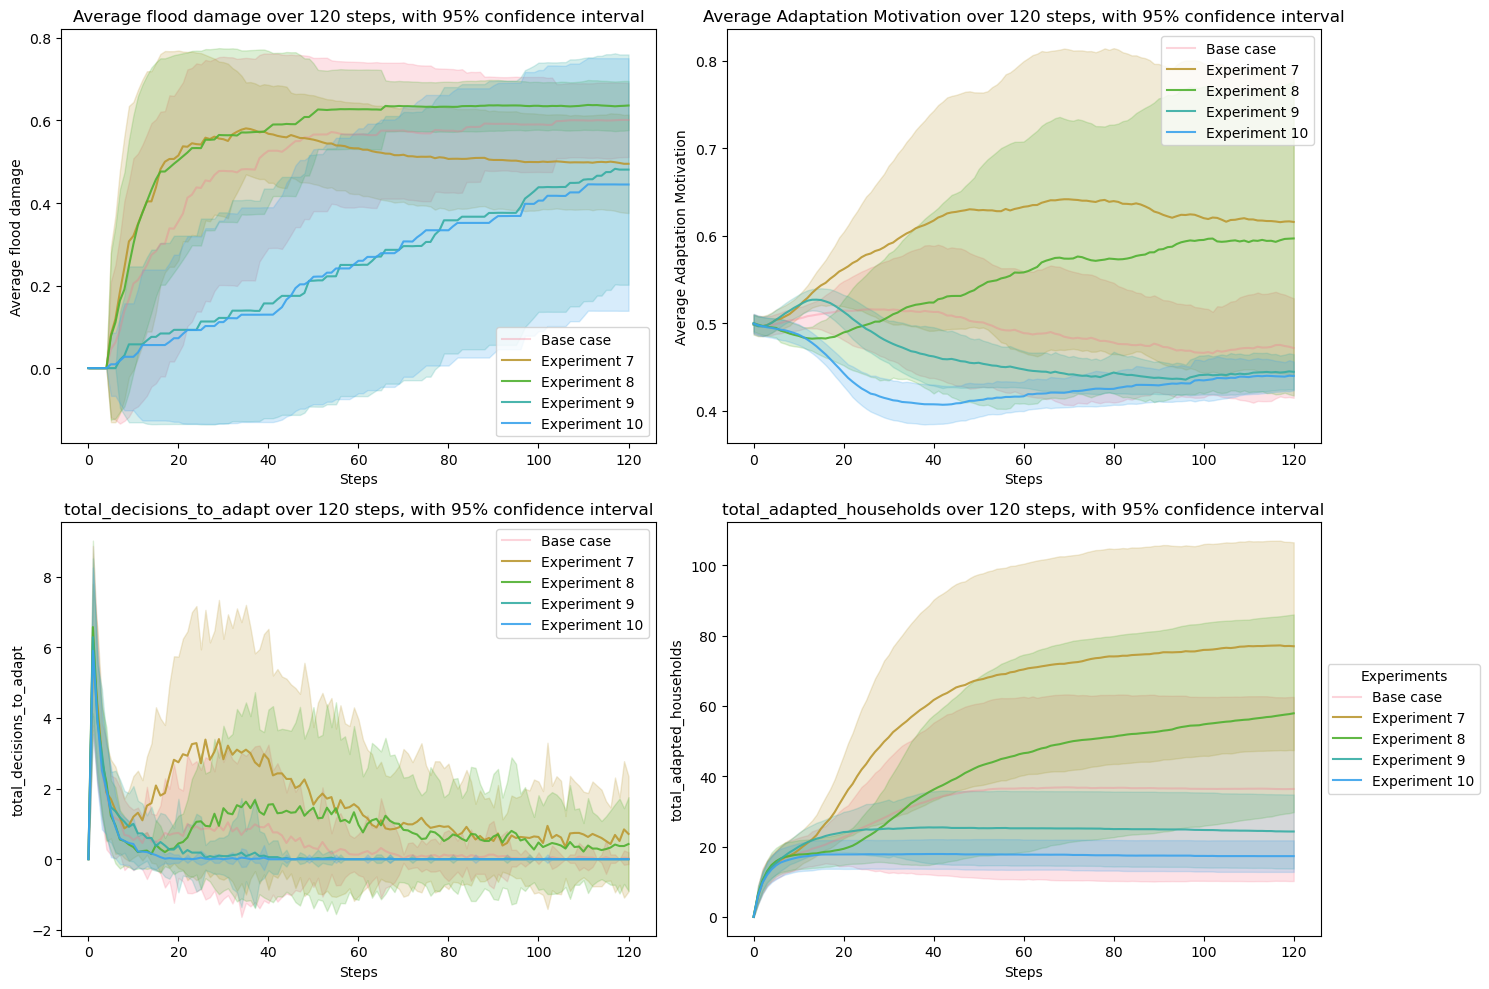

In [76]:
plot_experiments(KPIs, dfs3, 7, 3)

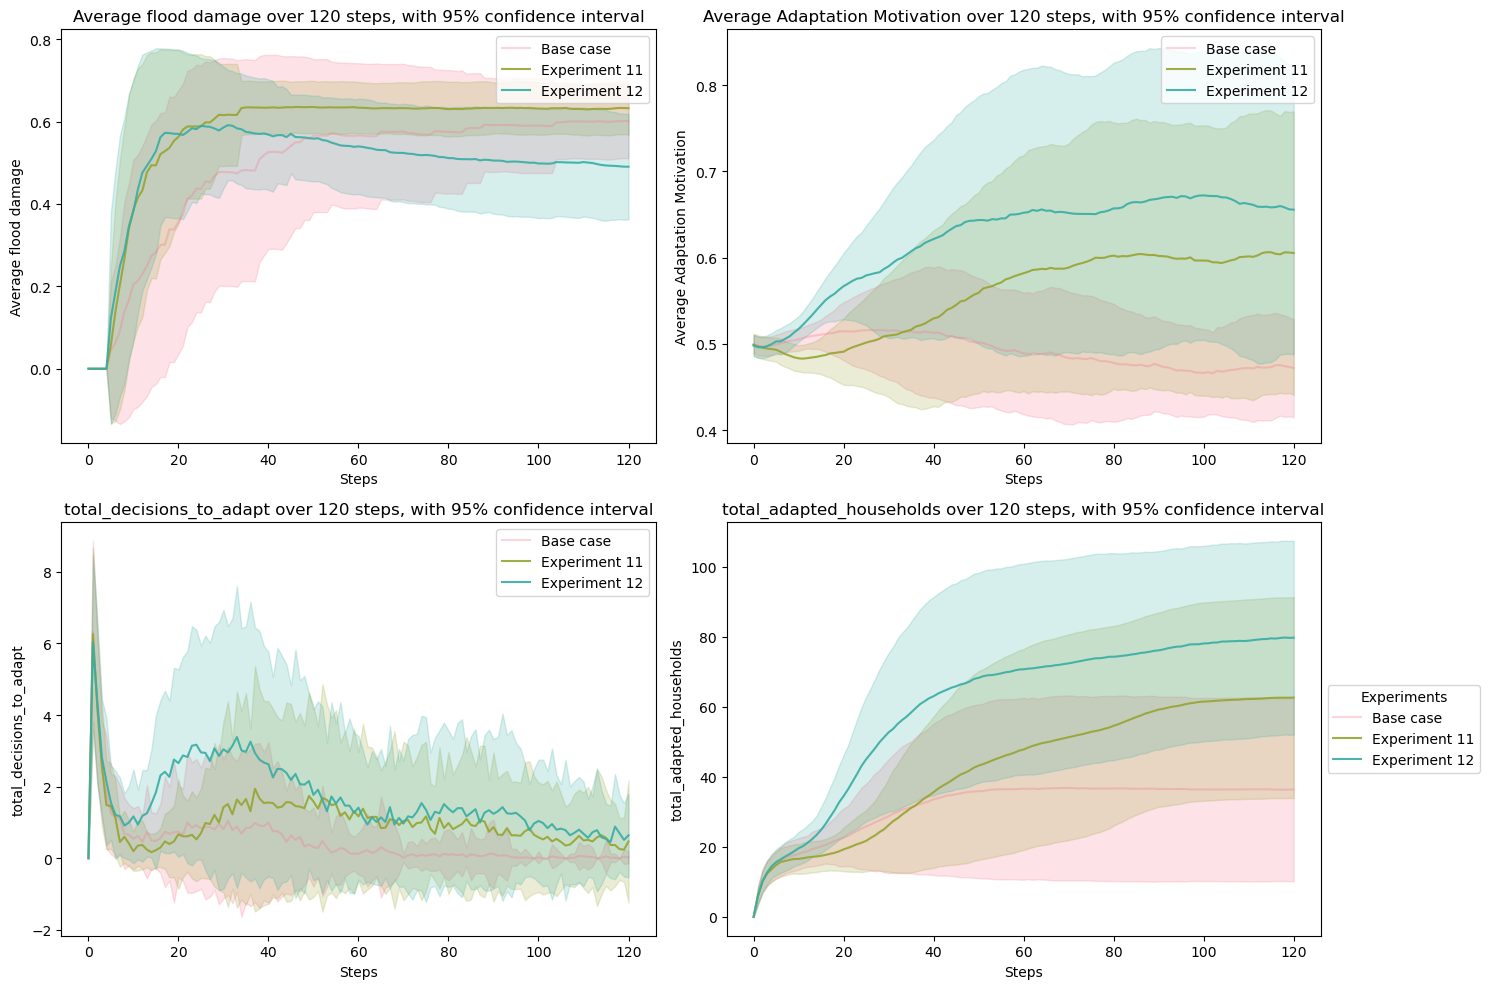

In [78]:
plot_experiments(KPIs, dfs4, 11, 4)

# Extra: Plot each subplot individually

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_experiments(KPIs, dfs, exp_start, fignr):
    # Define a custom color palette with distinct colors
    custom_palette = sns.color_palette("husl", n_colors=len(dfs) + 1)

    for i, kpi in enumerate(KPIs):
        num = exp_start
        plt.figure(figsize=(10, 6))
        ax = plt.gca()  # Get the current axis

        ax.set_title(f"{kpi} over 120 steps, with 95% confidence interval")
        ax.set_xlabel("Steps")
        ax.set_ylabel(kpi)

        # Plot base case with a custom color
        sns.lineplot(x="Step", y=kpi, data=dfs[0], ci="sd", err_style="band", label="Base case", alpha=0.3, color=custom_palette[0])

        # Plot experiments with custom colors
        for j, df in enumerate(dfs[1:]):
            sns.lineplot(x="Step", y=kpi, data=df, ci="sd", err_style="band", label=f"Experiment {num}", alpha=0.9, color=custom_palette[j + 1])
            num += 1

        # Add legend
        ax.legend(title="Experiments", loc='center left', bbox_to_anchor=(1, 0.5))

        # Save the figure with a unique filename for each plot
        plt.savefig(f"plot_{kpi}_exp{fignr}.png", dpi=300, bbox_inches='tight')

        plt.show()
        
        # Close the current figure to start a new one for the next iteration
        plt.close()

# Example usage
# Assuming KPIs and dfs are defined elsewhere
# exp_start is the starting number for experiment labels
# fignr is a unique identifier for filenames
# plot_experiments(KPIs, dfs, exp_start, fignr)


In [68]:
plot_experiments(KPIs, dfs1, 1, 1)

In [69]:
plot_experiments(KPIs, dfs2, 4, 2)

In [70]:
plot_experiments(KPIs, dfs3, 7, 3)

In [71]:
plot_experiments(KPIs, dfs4, 10, 4)